In [1]:
pip install snscrape

Note: you may need to restart the kernel to use updated packages.


In [2]:
import snscrape.modules.twitter as sntwitter

In [3]:
import pandas as pd

In [4]:
query="Is iphone 12 worth it?"

In [5]:
tweets=[]

In [6]:
limit=100

In [7]:
#Create the dataset

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  
  if len(tweets)==limit:
    break
  else:
    tweets.append([tweet.date,tweet.id, tweet.username, tweet.content])  

C:\Users\aimei\AppData\Local\Temp\ipykernel_21632\2327618959.py:8: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date,tweet.id, tweet.username, tweet.content])


In [8]:
model=pd.DataFrame(tweets, columns=['Date','ID','Username','Tweet'])

#Showing the first version of the dataset
model

,Date,ID,Username,Tweet
0,2022-10-21 13:10:49+00:00,1583445702746984448,rizwanazad09,@ishanagarwal24 I’ve been using iPhone 12 for ...
1,2022-10-17 16:08:07+00:00,1582040769543966720,bigfardanay,@salvahed Is pixel honestly worth it? I got iP...
2,2022-10-13 19:37:28+00:00,1580643902708912128,zameer044,@JordanFloyd97 Reason for the change from ipho...
3,2022-10-09 22:01:30+00:00,1579230602066538496,pradaabrunette,y’all is iphone 12 worth it??
4,2022-10-08 00:38:17+00:00,1578545278797611008,bbsafie,I have money but... Is pre-owned iphone 12 wor...
...,...,...,...,...
95,2021-09-14 18:40:20+00:00,1437848708842938372,Commandr_nchief,@krgibson89 I have the iPhone 12. Is the 12 pr...
96,2021-09-14 18:04:39+00:00,1437839728414543873,badge564,@saschasegan will this really be worth buying ...
97,2021-09-13 10:04:05+00:00,1437356401257435144,Fernby,Looking to upgrade my phone in the next month ...
98,2021-09-07 23:13:26+00:00,1435380719421960192,adreaaliyah,Is the iPhone 12 worth it ?


In [9]:
# Text arrangement : test clean

In [10]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
test_clean = clean_text(model, "Tweet")


In [11]:
test_clean

,Date,ID,Username,Tweet
0,2022-10-21 13:10:49+00:00,1583445702746984448,rizwanazad09,ive been using iphone 12 for the past 2 years...
1,2022-10-17 16:08:07+00:00,1582040769543966720,bigfardanay,is pixel honestly worth it i got iphone 12 pr...
2,2022-10-13 19:37:28+00:00,1580643902708912128,zameer044,reason for the change from iphone 12 to pixel...
3,2022-10-09 22:01:30+00:00,1579230602066538496,pradaabrunette,yall is iphone 12 worth it
4,2022-10-08 00:38:17+00:00,1578545278797611008,bbsafie,i have money but is preowned iphone 12 worth i...
...,...,...,...,...
95,2021-09-14 18:40:20+00:00,1437848708842938372,Commandr_nchief,i have the iphone 12 is the 12 pro worth it
96,2021-09-14 18:04:39+00:00,1437839728414543873,badge564,will this really be worth buying or is the ip...
97,2021-09-13 10:04:05+00:00,1437356401257435144,Fernby,looking to upgrade my phone in the next month ...
98,2021-09-07 23:13:26+00:00,1435380719421960192,adreaaliyah,is the iphone 12 worth it


In [12]:
#Sentiments analysis:

In [12]:
#Importing the libraries
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aimei\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
#Function of sentiment analysis
sid = SentimentIntensityAnalyzer()

In [14]:
#Model of example
a = 'God is kind'
sid.polarity_scores(a)


{'neg': 0.0, 'neu': 0.154, 'pos': 0.846, 'compound': 0.6705}

In [15]:
#Initialize the table of Scores
Scores=[]

In [16]:
for score in test_clean['Tweet']:
  if len(Scores)==limit:
    break
  else:
    Scores.append(sid.polarity_scores(score))

In [17]:
Scores

[{'neg': 0.0, 'neu': 0.934, 'pos': 0.066, 'compound': 0.2263},
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.7783},
 {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.2263},
 {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.2263},
 {'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.3291},
 {'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.2263},
 {'neg': 0.08, 'neu': 0.779, 'pos': 0.141, 'compound': 0.6746},
 {'neg': 0.062, 'neu': 0.708, 'pos': 0.23, 'compound': 0.765},
 {'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.3597},
 {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.2263},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.2263},
 {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.2263},
 {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.561},
 {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.4215},
 {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'compound': 0.7269},

In [18]:
#The table Scores must be reoganized and to this we will use json_normalize

In [19]:
modeljson = pd.json_normalize(Scores)
modeljson

,neg,neu,pos,compound
0,0.0,0.934,0.066,0.2263
1,0.0,0.606,0.394,0.7783
2,0.0,0.921,0.079,0.2263
3,0.0,0.725,0.275,0.2263
4,0.0,0.895,0.105,0.3291
...,...,...,...,...
95,0.0,0.826,0.174,0.2263
96,0.0,0.763,0.237,0.5198
97,0.0,0.932,0.068,0.2263
98,0.0,0.725,0.275,0.2263


In [21]:
#We must concatenate the two dataset
new_model = (pd.concat([test_clean, modeljson], axis=1) )
new_model

,Date,ID,Username,Tweet,neg,neu,pos,compound
0,2022-10-21 13:10:49+00:00,1583445702746984448,rizwanazad09,ive been using iphone 12 for the past 2 years...,0.0,0.934,0.066,0.2263
1,2022-10-17 16:08:07+00:00,1582040769543966720,bigfardanay,is pixel honestly worth it i got iphone 12 pr...,0.0,0.606,0.394,0.7783
2,2022-10-13 19:37:28+00:00,1580643902708912128,zameer044,reason for the change from iphone 12 to pixel...,0.0,0.921,0.079,0.2263
3,2022-10-09 22:01:30+00:00,1579230602066538496,pradaabrunette,yall is iphone 12 worth it,0.0,0.725,0.275,0.2263
4,2022-10-08 00:38:17+00:00,1578545278797611008,bbsafie,i have money but is preowned iphone 12 worth i...,0.0,0.895,0.105,0.3291
...,...,...,...,...,...,...,...,...
95,2021-09-14 18:40:20+00:00,1437848708842938372,Commandr_nchief,i have the iphone 12 is the 12 pro worth it,0.0,0.826,0.174,0.2263
96,2021-09-14 18:04:39+00:00,1437839728414543873,badge564,will this really be worth buying or is the ip...,0.0,0.763,0.237,0.5198
97,2021-09-13 10:04:05+00:00,1437356401257435144,Fernby,looking to upgrade my phone in the next month ...,0.0,0.932,0.068,0.2263
98,2021-09-07 23:13:26+00:00,1435380719421960192,adreaaliyah,is the iphone 12 worth it,0.0,0.725,0.275,0.2263


In [22]:
new_model['year'] = new_model['Date'].dt.year

In [22]:
new_model

,Date,ID,Username,Tweet,neg,neu,pos,compound
0,2022-10-21 13:10:49+00:00,1583445702746984448,rizwanazad09,ive been using iphone 12 for the past 2 years...,0.0,0.934,0.066,0.2263
1,2022-10-17 16:08:07+00:00,1582040769543966720,bigfardanay,is pixel honestly worth it i got iphone 12 pr...,0.0,0.606,0.394,0.7783
2,2022-10-13 19:37:28+00:00,1580643902708912128,zameer044,reason for the change from iphone 12 to pixel...,0.0,0.921,0.079,0.2263
3,2022-10-09 22:01:30+00:00,1579230602066538496,pradaabrunette,yall is iphone 12 worth it,0.0,0.725,0.275,0.2263
4,2022-10-08 00:38:17+00:00,1578545278797611008,bbsafie,i have money but is preowned iphone 12 worth i...,0.0,0.895,0.105,0.3291
...,...,...,...,...,...,...,...,...
95,2021-09-14 18:40:20+00:00,1437848708842938372,Commandr_nchief,i have the iphone 12 is the 12 pro worth it,0.0,0.826,0.174,0.2263
96,2021-09-14 18:04:39+00:00,1437839728414543873,badge564,will this really be worth buying or is the ip...,0.0,0.763,0.237,0.5198
97,2021-09-13 10:04:05+00:00,1437356401257435144,Fernby,looking to upgrade my phone in the next month ...,0.0,0.932,0.068,0.2263
98,2021-09-07 23:13:26+00:00,1435380719421960192,adreaaliyah,is the iphone 12 worth it,0.0,0.725,0.275,0.2263


In [23]:
new_model['month'] = new_model['Date'].dt.month

In [25]:
new_model

,Date,ID,Place,Username,Tweet,neg,neu,pos,compound,year,month
0,2022-10-23 14:41:40+00:00,1584193341712760832,None,Tef_lon_don,heard they were fighting over nokia asha 200,0.263,0.737,0.000,-0.3612,2022,10
1,2022-10-23 07:32:09+00:00,1584085252884287488,None,Shlok_PM1711,for me its nokia asha 200 with the qwerty key...,0.000,0.755,0.245,0.5994,2022,10
2,2022-10-23 05:16:31+00:00,1584051116261933056,None,moostarfar14,nokia asha 200,0.000,1.000,0.000,0.0000,2022,10
3,2022-10-20 20:47:43+00:00,1583198297178931200,"Place(fullName='Abuja, Nigeria', name='Abuja',...",TweeetPrincez,ade5 alhamdulillah for you alhamdulillah for ...,0.000,1.000,0.000,0.0000,2022,10
4,2022-10-20 12:15:17+00:00,1583069339380776962,None,Tashkenli,nokia 6720 nokia 1202 nokia asha 200 galaxy a...,0.000,1.000,0.000,0.0000,2022,10
...,...,...,...,...,...,...,...,...,...,...,...
95,2022-08-18 17:28:22+00:00,1560317697057071109,None,EfteeCrown,i still have this nokia asha 200,0.000,1.000,0.000,0.0000,2022,8
96,2022-08-18 17:11:38+00:00,1560313483778035712,None,itsmbugua,this is a nokia asha 200,0.000,1.000,0.000,0.0000,2022,8
97,2022-08-18 16:24:06+00:00,1560301521916542976,None,ithsmy,nokia asha 200,0.000,1.000,0.000,0.0000,2022,8
98,2022-08-18 13:05:11+00:00,1560251463510724616,None,aridunu27,nokia asha 200,0.000,1.000,0.000,0.0000,2022,8


In [26]:
for d in new_model['Date']:
    new_model['date'] = d.date()
    new_model['time'] = d.time()

In [27]:
new_model

,Date,ID,Place,Username,Tweet,neg,neu,pos,compound,year,month,date,time
0,2022-10-23 14:41:40+00:00,1584193341712760832,None,Tef_lon_don,heard they were fighting over nokia asha 200,0.263,0.737,0.000,-0.3612,2022,10,2022-08-18,06:08:06
1,2022-10-23 07:32:09+00:00,1584085252884287488,None,Shlok_PM1711,for me its nokia asha 200 with the qwerty key...,0.000,0.755,0.245,0.5994,2022,10,2022-08-18,06:08:06
2,2022-10-23 05:16:31+00:00,1584051116261933056,None,moostarfar14,nokia asha 200,0.000,1.000,0.000,0.0000,2022,10,2022-08-18,06:08:06
3,2022-10-20 20:47:43+00:00,1583198297178931200,"Place(fullName='Abuja, Nigeria', name='Abuja',...",TweeetPrincez,ade5 alhamdulillah for you alhamdulillah for ...,0.000,1.000,0.000,0.0000,2022,10,2022-08-18,06:08:06
4,2022-10-20 12:15:17+00:00,1583069339380776962,None,Tashkenli,nokia 6720 nokia 1202 nokia asha 200 galaxy a...,0.000,1.000,0.000,0.0000,2022,10,2022-08-18,06:08:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-08-18 17:28:22+00:00,1560317697057071109,None,EfteeCrown,i still have this nokia asha 200,0.000,1.000,0.000,0.0000,2022,8,2022-08-18,06:08:06
96,2022-08-18 17:11:38+00:00,1560313483778035712,None,itsmbugua,this is a nokia asha 200,0.000,1.000,0.000,0.0000,2022,8,2022-08-18,06:08:06
97,2022-08-18 16:24:06+00:00,1560301521916542976,None,ithsmy,nokia asha 200,0.000,1.000,0.000,0.0000,2022,8,2022-08-18,06:08:06
98,2022-08-18 13:05:11+00:00,1560251463510724616,None,aridunu27,nokia asha 200,0.000,1.000,0.000,0.0000,2022,8,2022-08-18,06:08:06


In [24]:
new_model

,Date,ID,Username,Tweet,neg,neu,pos,compound,month
0,2022-10-21 13:10:49+00:00,1583445702746984448,rizwanazad09,ive been using iphone 12 for the past 2 years...,0.0,0.934,0.066,0.2263,10
1,2022-10-17 16:08:07+00:00,1582040769543966720,bigfardanay,is pixel honestly worth it i got iphone 12 pr...,0.0,0.606,0.394,0.7783,10
2,2022-10-13 19:37:28+00:00,1580643902708912128,zameer044,reason for the change from iphone 12 to pixel...,0.0,0.921,0.079,0.2263,10
3,2022-10-09 22:01:30+00:00,1579230602066538496,pradaabrunette,yall is iphone 12 worth it,0.0,0.725,0.275,0.2263,10
4,2022-10-08 00:38:17+00:00,1578545278797611008,bbsafie,i have money but is preowned iphone 12 worth i...,0.0,0.895,0.105,0.3291,10
...,...,...,...,...,...,...,...,...,...
95,2021-09-14 18:40:20+00:00,1437848708842938372,Commandr_nchief,i have the iphone 12 is the 12 pro worth it,0.0,0.826,0.174,0.2263,9
96,2021-09-14 18:04:39+00:00,1437839728414543873,badge564,will this really be worth buying or is the ip...,0.0,0.763,0.237,0.5198,9
97,2021-09-13 10:04:05+00:00,1437356401257435144,Fernby,looking to upgrade my phone in the next month ...,0.0,0.932,0.068,0.2263,9
98,2021-09-07 23:13:26+00:00,1435380719421960192,adreaaliyah,is the iphone 12 worth it,0.0,0.725,0.275,0.2263,9


In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


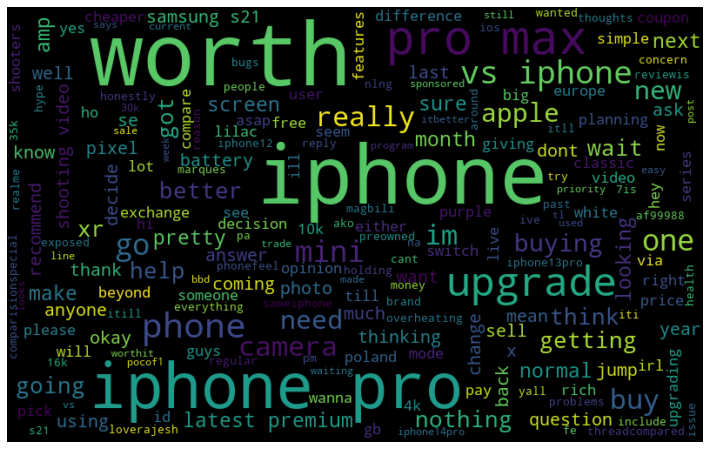

In [26]:
# visualize the frequent words
import matplotlib.pyplot as plt
all_words = " ".join([sentence for sentence in new_model['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
import numpy as np
#Collect the compound values for each news source*
score_table = new_model.pivot_table(index='Username',  values="compound", aggfunc = np.mean)
score_table

,compound
Username,
1ordinary_boy,0.0000
254laflare,0.4715
255tommy,0.0000
4tejah,0.0000
ABAYOMIJOEL3,0.2263
...,...
stanconero_55,0.0000
tteumtrz,-0.2960
ubadinekethedev,0.0000


<AxesSubplot:xlabel='Username'>

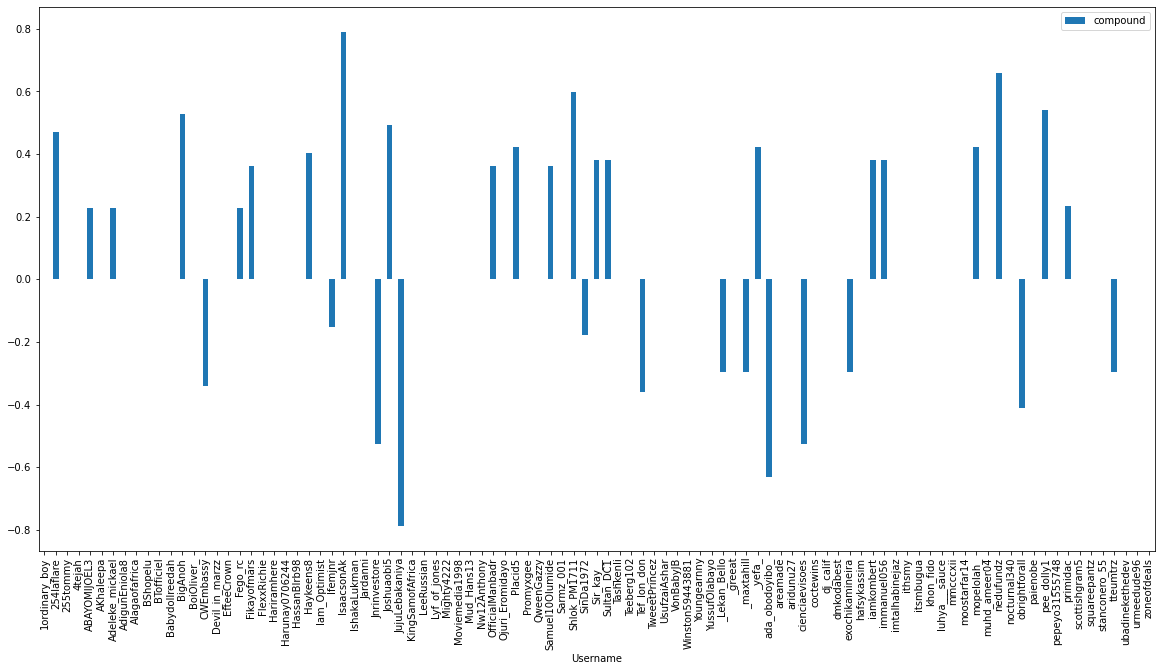

In [32]:
#plotting
#plt.figure(figsize=(50,50))
score_table.plot(kind='bar',figsize=(20,10))


In [33]:
#Collect the negative values for each news source
neg_score_table = new_model.pivot_table(index='Username',  values="neg", aggfunc = np.mean)
neg_score_table

,neg
Username,
1ordinary_boy,0.000
254laflare,0.094
255tommy,0.000
4tejah,0.000
ABAYOMIJOEL3,0.000
...,...
stanconero_55,0.000
tteumtrz,0.180
ubadinekethedev,0.000


<AxesSubplot:xlabel='Username'>

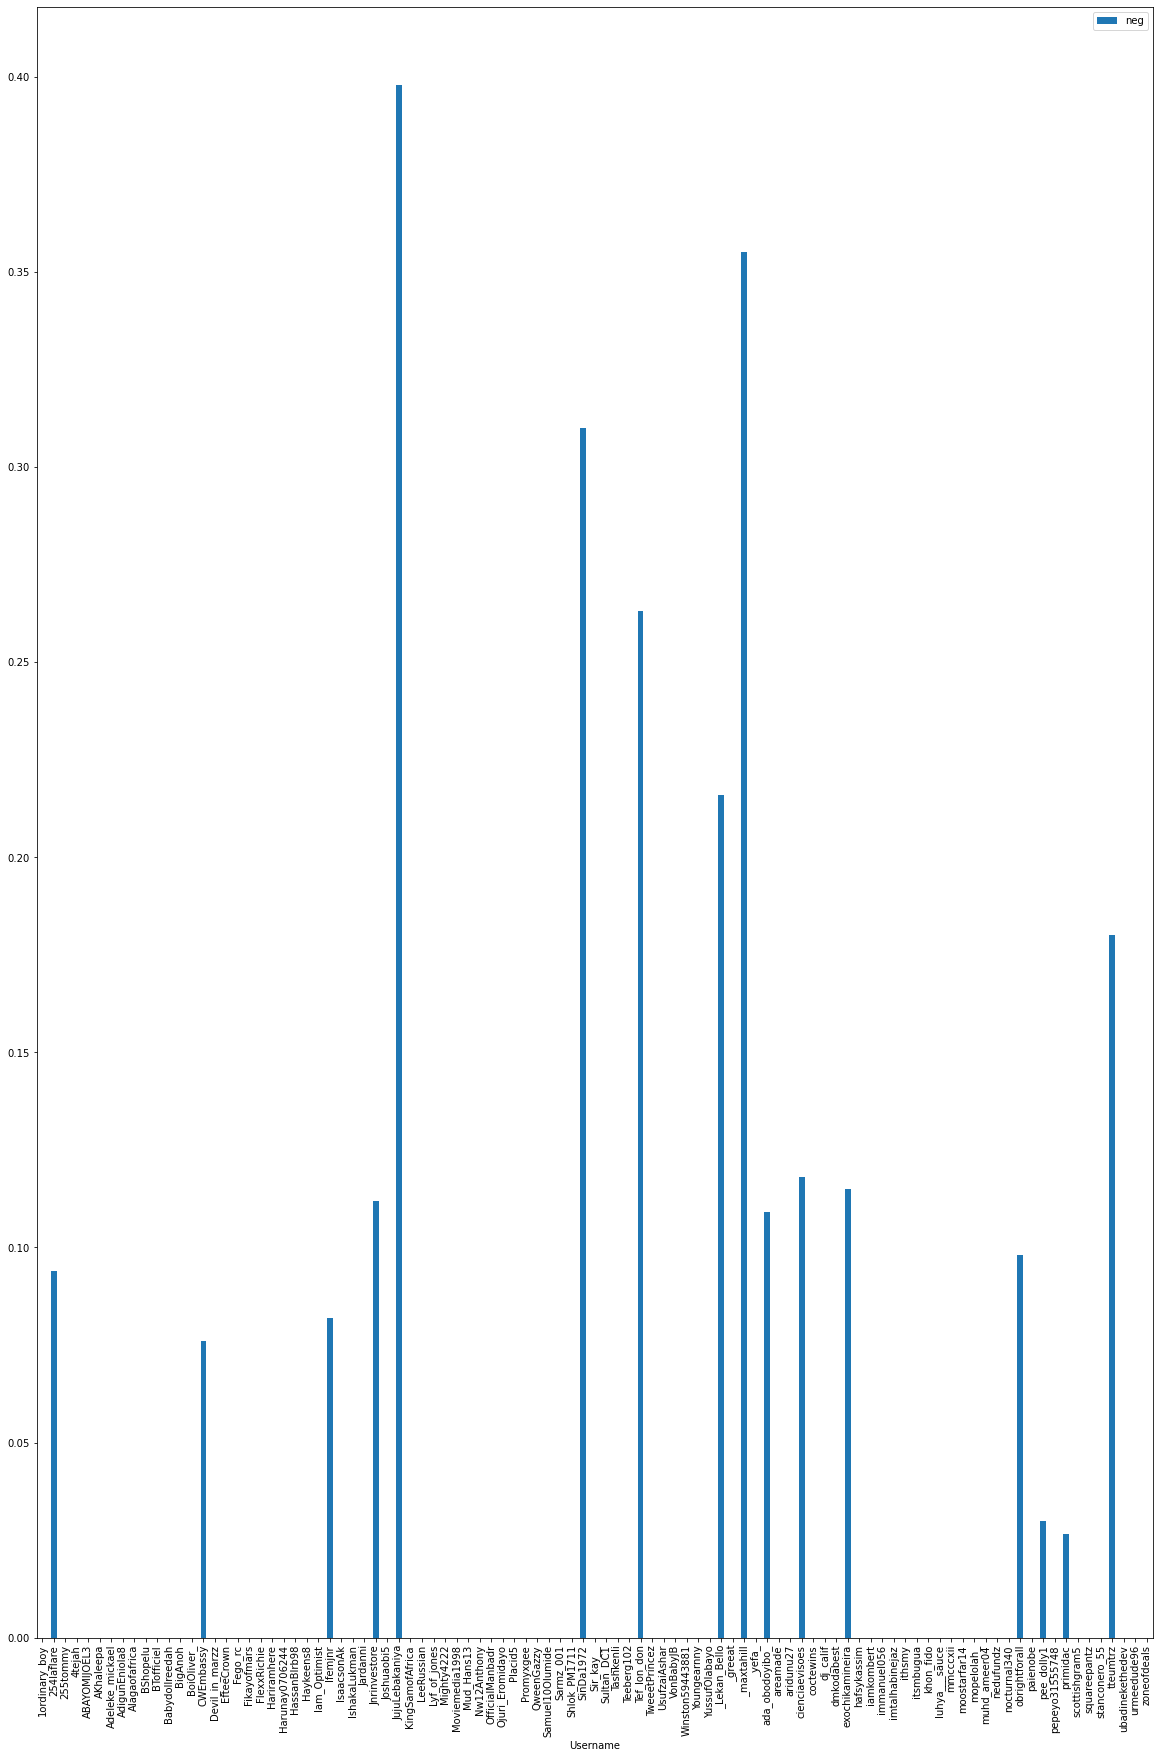

In [34]:
#plotting

neg_score_table.plot(kind='bar',figsize=(20,30))

<AxesSubplot:xlabel='Username'>

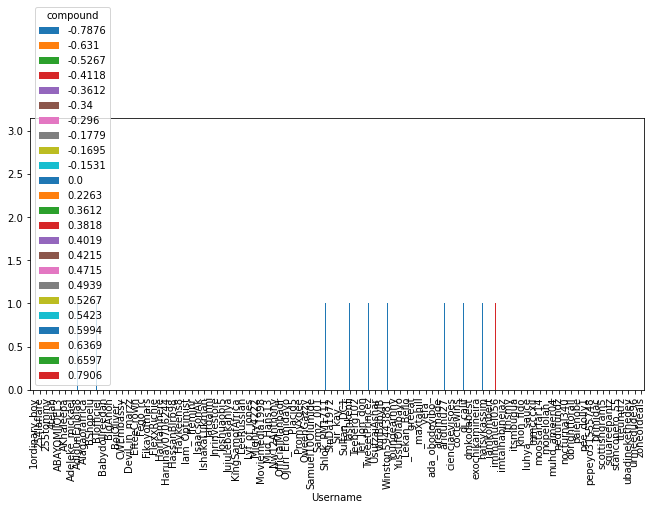

In [35]:
new_model.groupby(['Username', 'compound']).size().unstack().plot(kind='bar',figsize=(11, 5))

<AxesSubplot:xlabel='compound'>

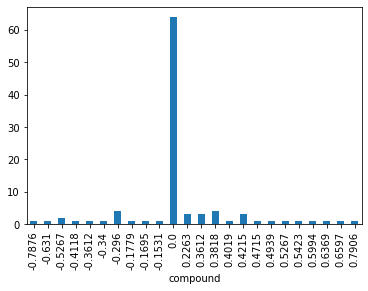

In [36]:
new_model.groupby('compound').size().plot(kind='bar')